With Python:

1 -	Create a dashboard, specifically using a pivot table;

2 -	View the averages for:
•	Pace
•	Self-Mastery
•	Support
•	Instructor Clarity
•	Instructor Engagement
•	Instructor Knowledge

for each class and university.

then we have Create two additional dashboards in Jupyter notebook and/or other visualization tool showing the averages for each class and university.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a dataframe
filename = 'universal_db.csv'
df = pd.read_csv(filename)

In [3]:
print(df.shape)
df.head()

(50000, 10)


,UniversityID,UniversityName,ClassCode,WeekNumber,WeekPace,AcademicSupport,ConceptMastering,instructorEngagement,instructorClarity,instructorknowledgeable
0,29,NaN,Class 10,2,3,4,4,5.0,5.0,5.0
1,29,NaN,Class 10,2,5,3,3,5.0,5.0,5.0
2,29,NaN,Class 10,2,3,3,1,5.0,4.0,5.0
3,29,NaN,Class 10,2,5,5,4,5.0,5.0,5.0
4,29,NaN,Class 10,2,4,5,4,5.0,5.0,5.0


In [4]:
# Pivot the dataframe, grouping by ['UniversityID', 'ClassCode'] and aggregating the average over some columns
# Pace • Self-Mastery • Support • Instructor Clarity • Instructor Engagement • Instructor Knowledge
values_columns = ['WeekPace', 'AcademicSupport', 'ConceptMastering', 'instructorEngagement',
                  'instructorClarity', 'instructorknowledgeable']

table = pd.pivot_table(df, index=['UniversityID', 'ClassCode'], values=values_columns, fill_value=0)
table.head()

AcademicSupport  ConceptMastering  WeekPace  \
UniversityID ClassCode                                                
14           Class 42          4.030303          3.356061  3.765152   
16           Class 31          4.309524          3.595238  4.130952   
             Class 55          4.152000          3.416000  3.864000   
20           Class 25          4.269231          3.615385  3.961538   
             Class 27          4.482759          3.586207  4.241379   

                        instructorClarity  instructorEngagement  \
UniversityID ClassCode                                            
14           Class 42            3.992424              4.227273   
16           Class 31            4.369048              4.380952   
             Class 55            4.240000              4.464000   
20           Class 25            3.769231              4.192308   
             Class 27            4.448276              4.689655   

                        instructorknowledgeable  
UniversityID ClassCode                           
14           Class 42                  4.537879  
16           Class 31                  4.630952  
             Class 55                  4.688000  
20           Class 25                  4.615385  
             Class 27                  4.758621

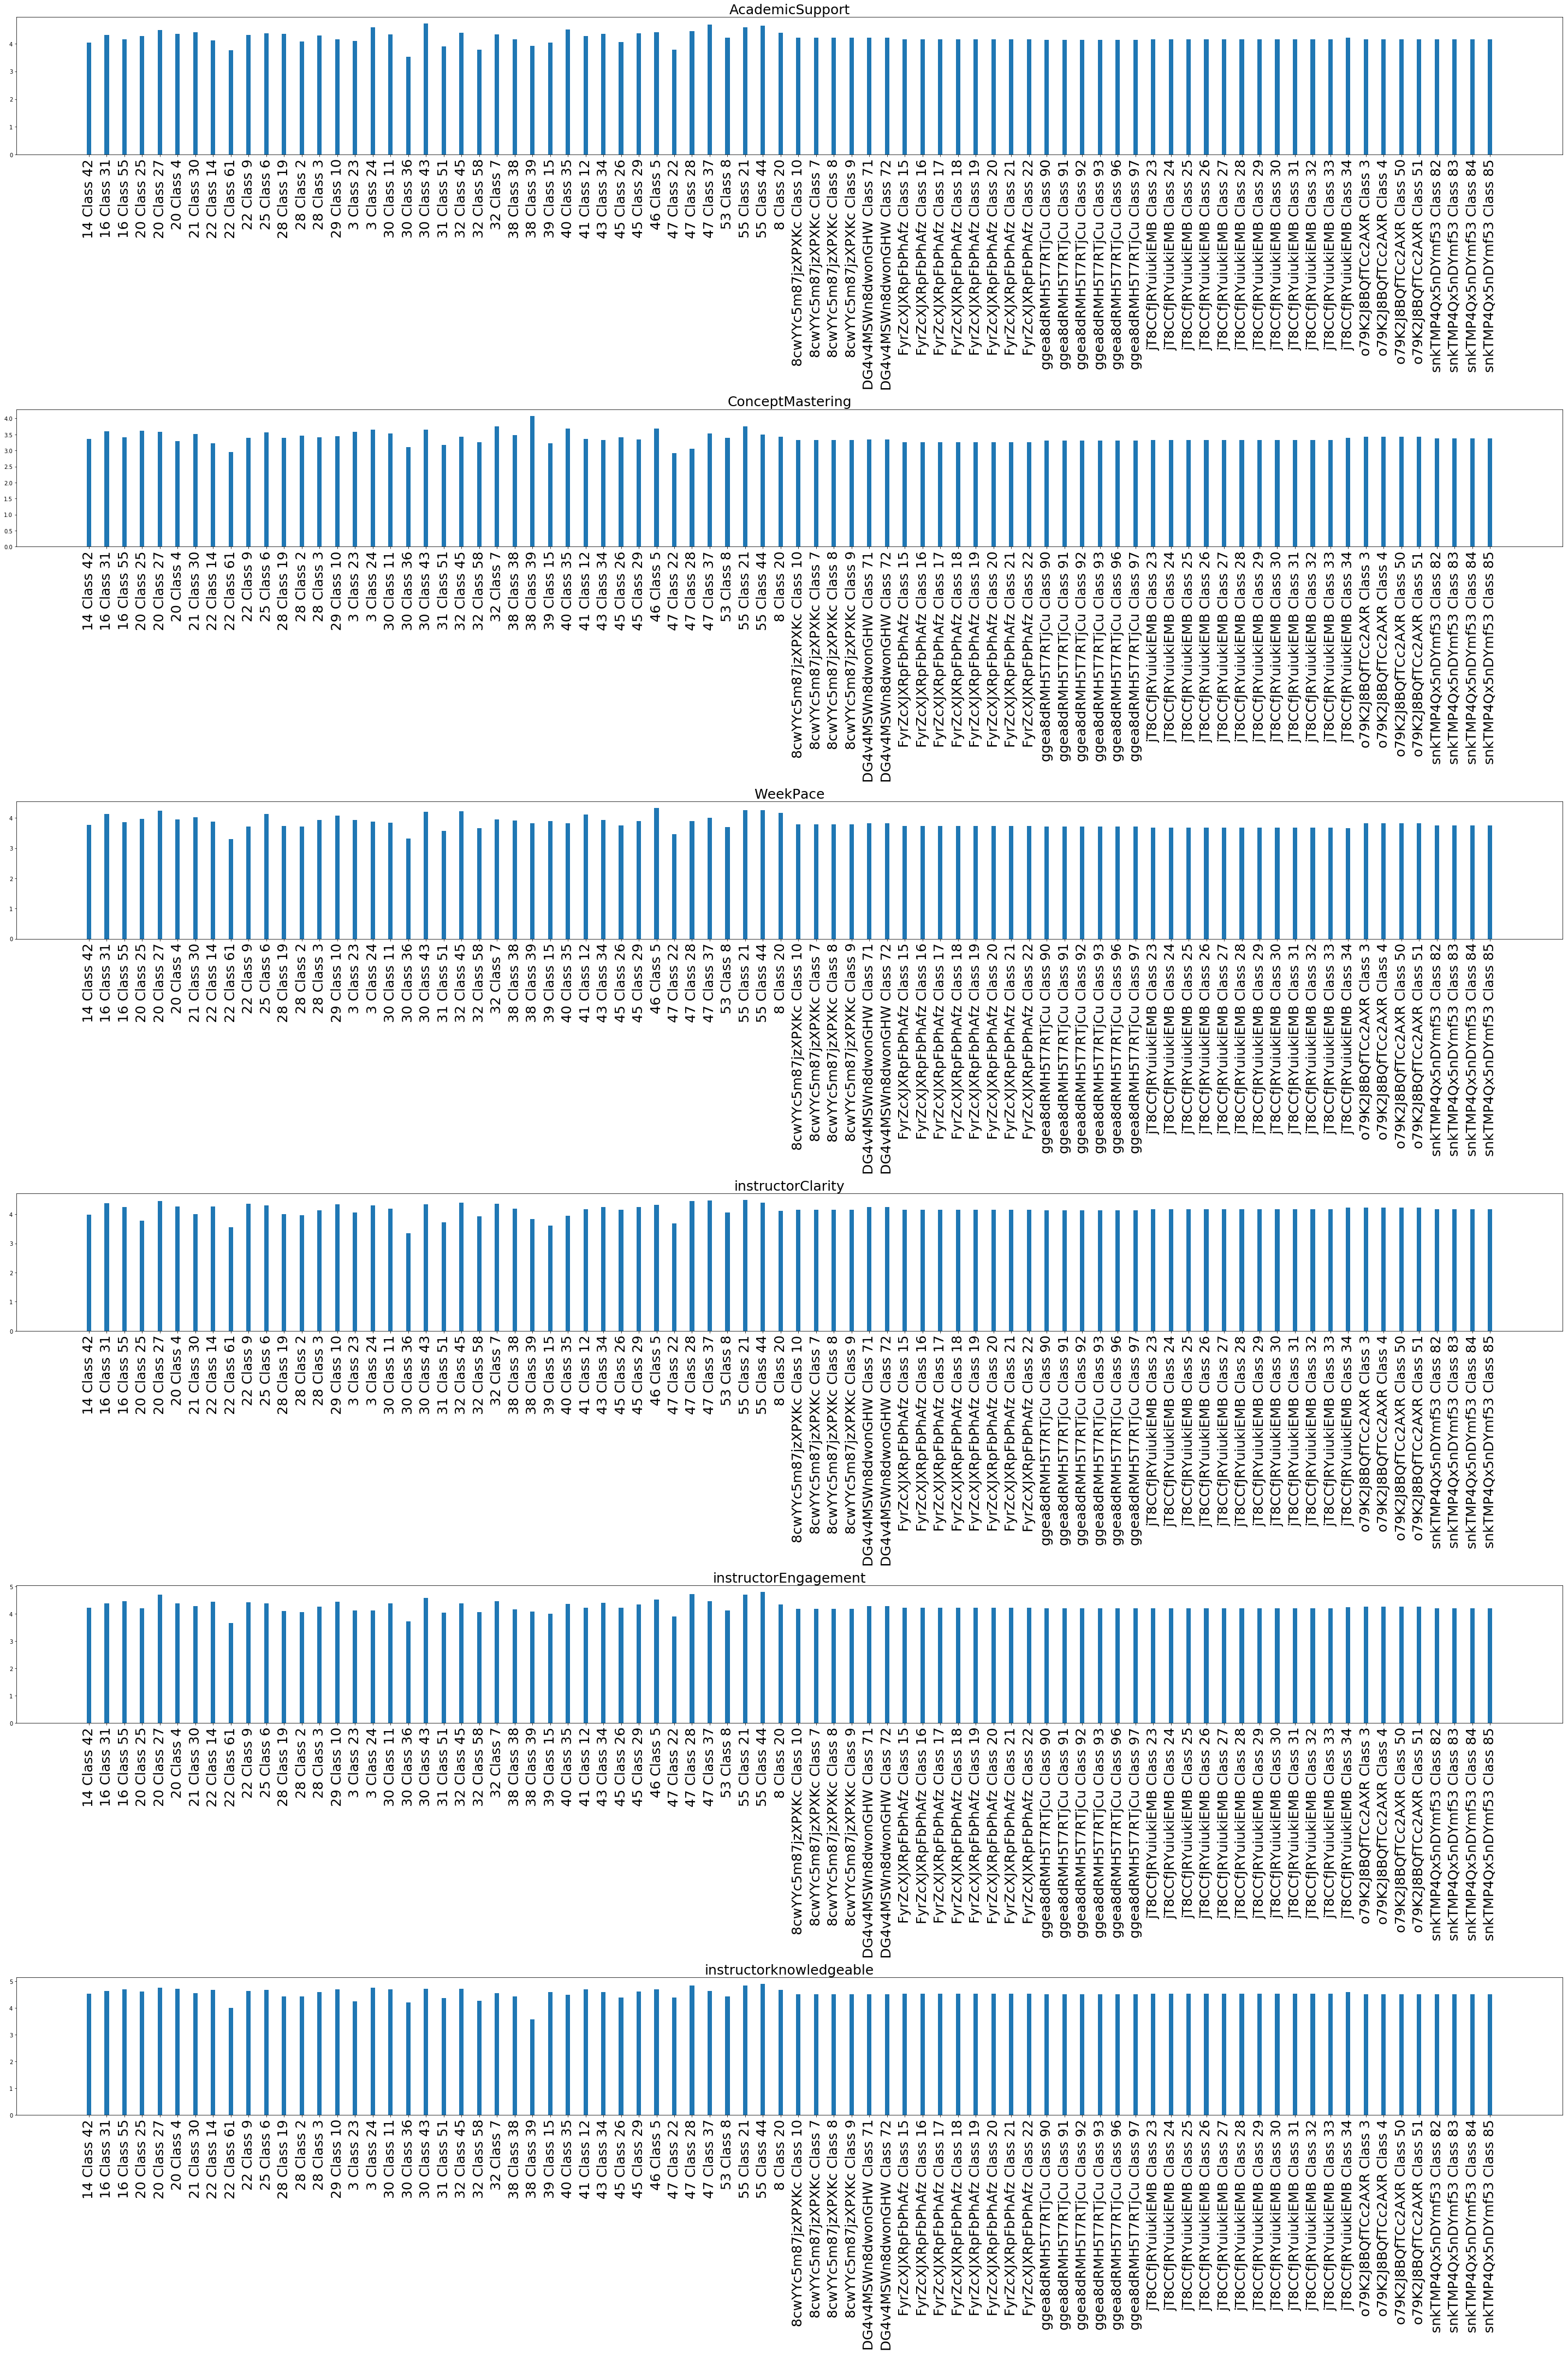

In [5]:
# Form a compound UniversityID-ClassCode label for bar plots
labels = [' '.join(i) for i in table.index]

# Create subplots for the value columns
fig, axs = plt.subplots(6, figsize=(40, 60)) 

# Iterate over the columns to plot the values 
for i, col in enumerate(table.columns):
    ax = axs[i]
    ax.bar(labels, table[col], width=0.25)
    
    ax.set_title(col, fontsize=25)
    
    # Rotate Xticks labels
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=25)
    
    
plt.tight_layout()

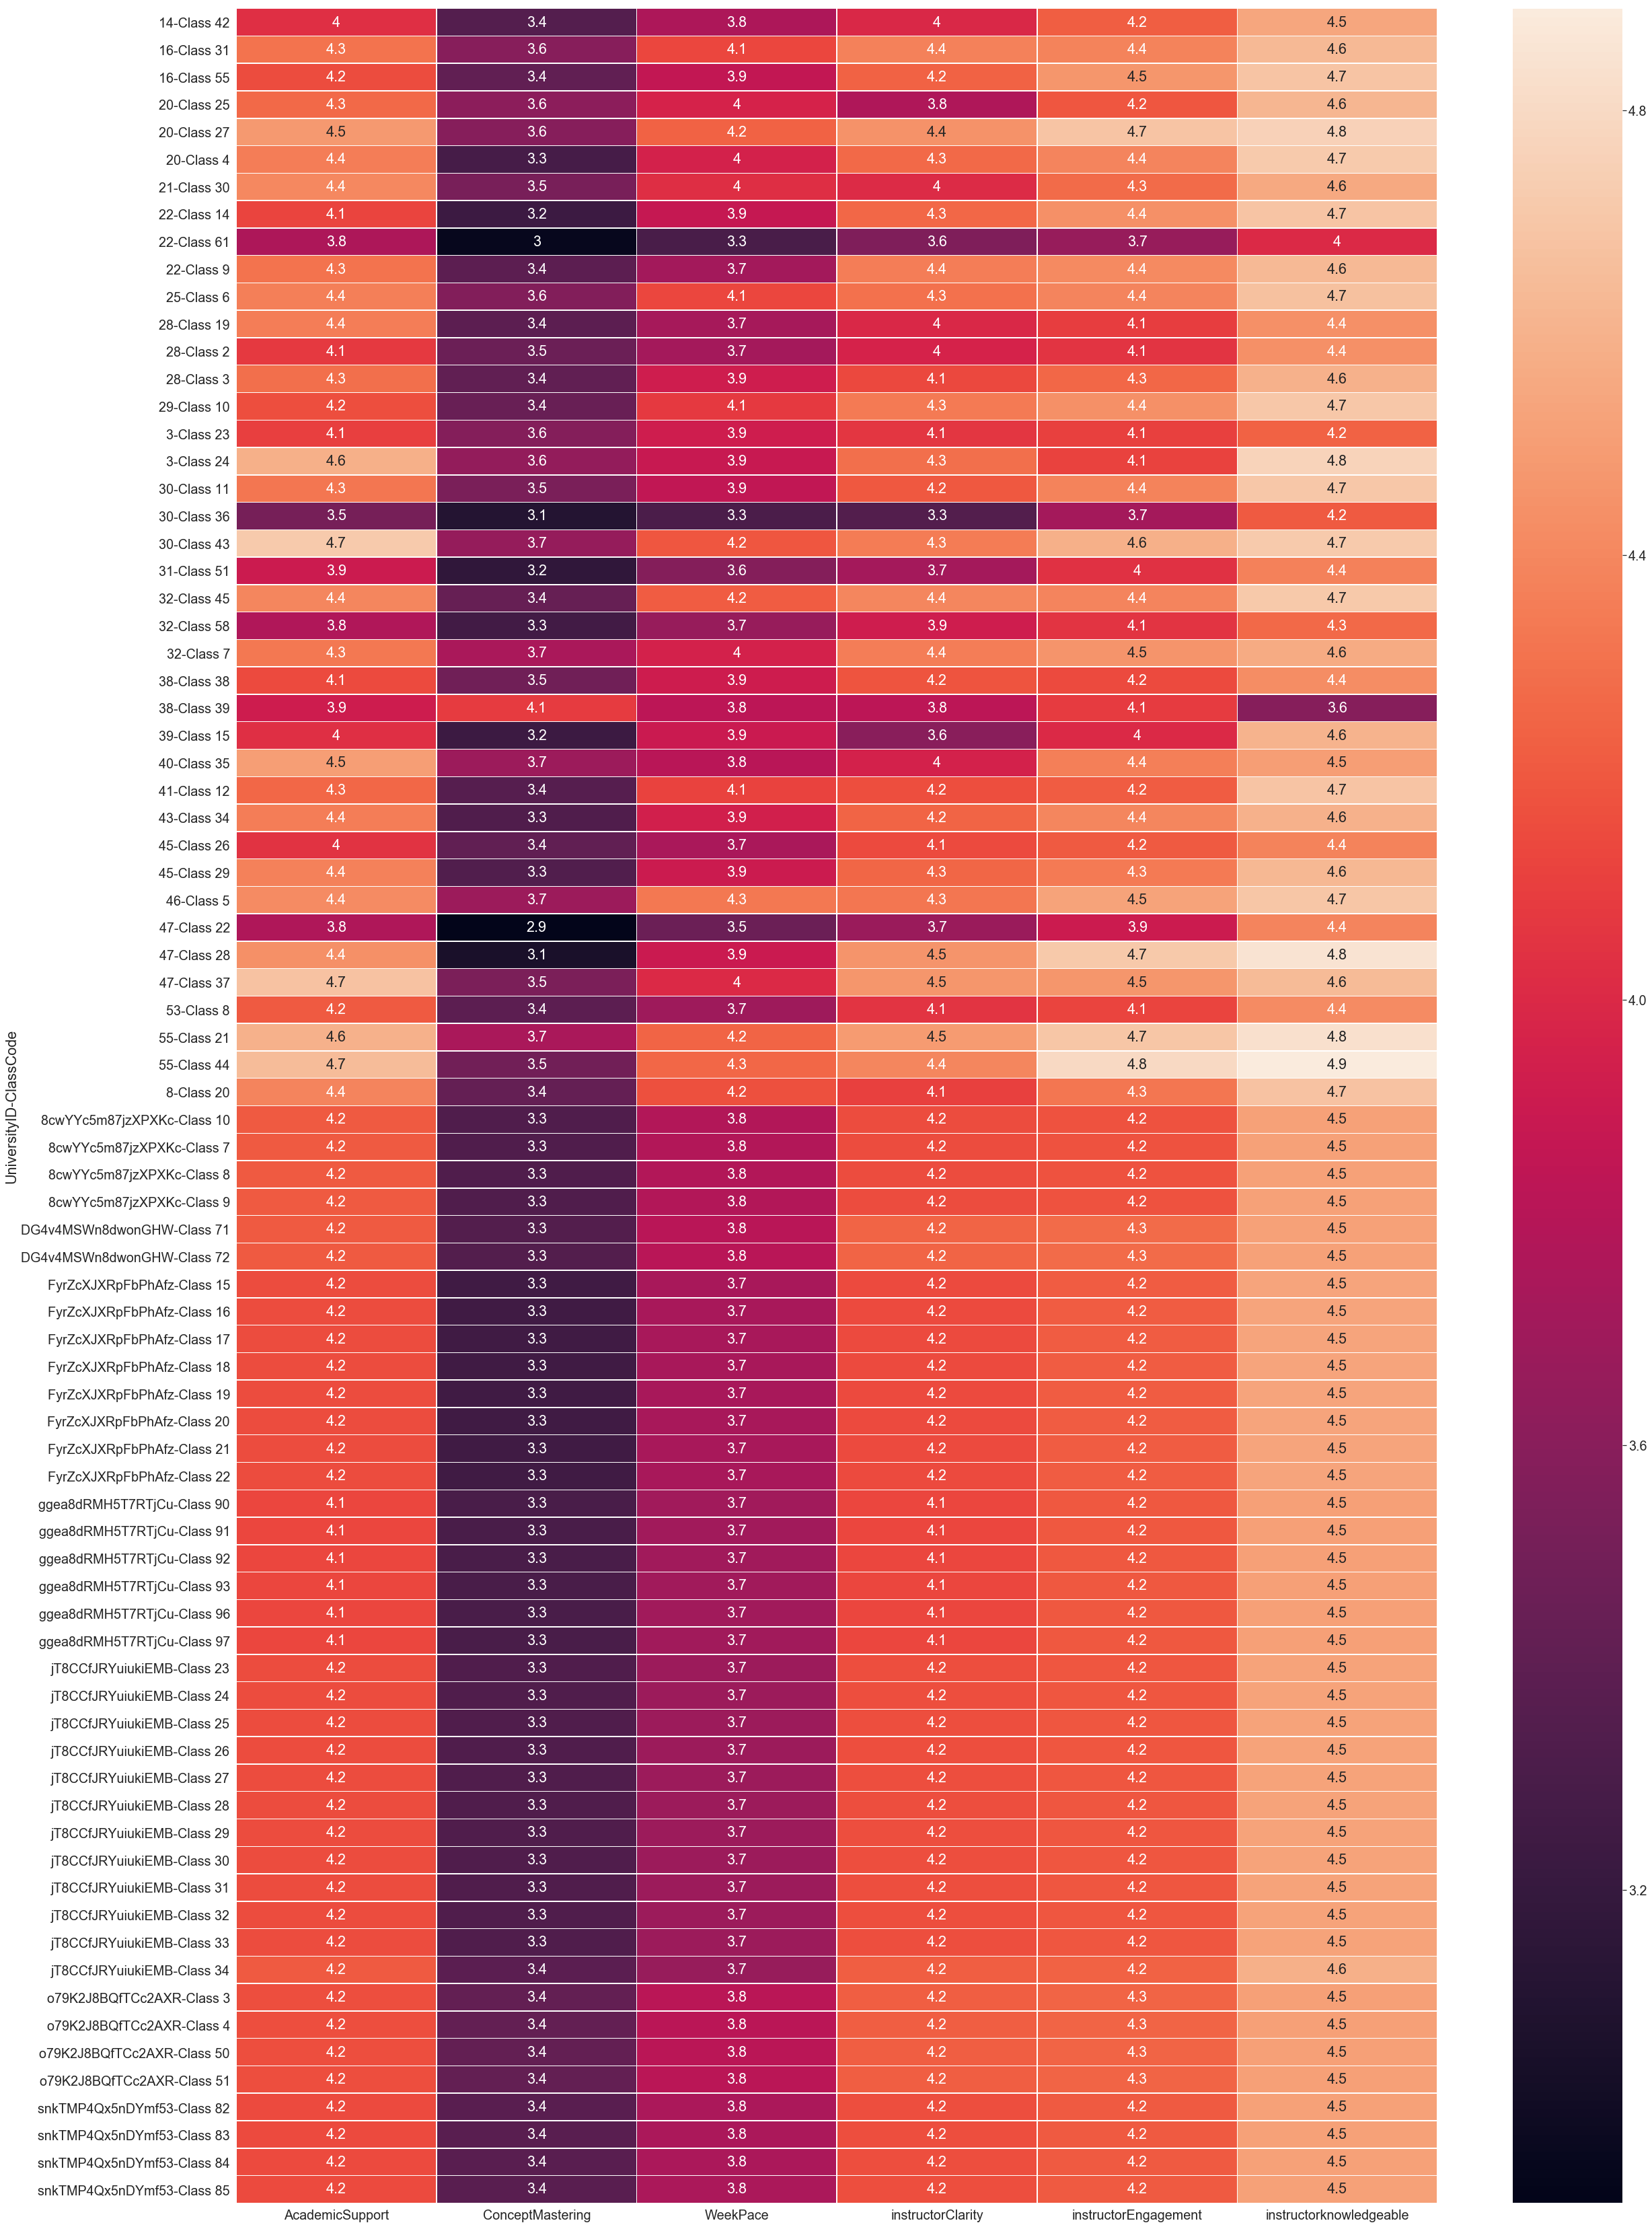

In [7]:
# Specify the figure size
fig = plt.figure(figsize=(40, 60))
# Enlarge the font size
sns.set(font_scale=1.8)

# Plot the heat map for the values
sns.heatmap(table, annot=True, linewidths=.5, )